<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/Homework05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.

# Solution to the homework

## The problem setup

I will be working on the setup given in the class. Below I reproduce the plots from the class.

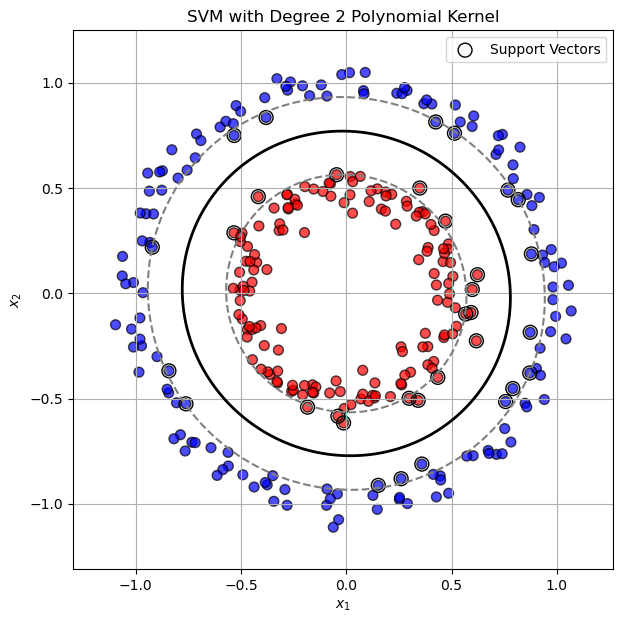

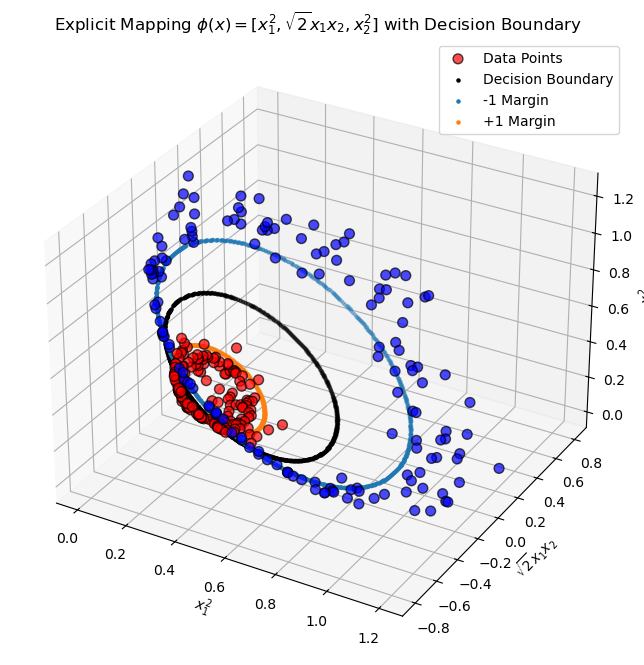

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()

# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')
contour_mask = np.isclose(grid_decision, -1, atol=0.01)
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           s=5, label='-1 Margin')
contour_mask = np.isclose(grid_decision, 1, atol=0.01)
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           s=5, label='+1 Margin')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping $\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$ with Decision Boundary')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')

# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()

## Answer to the questions

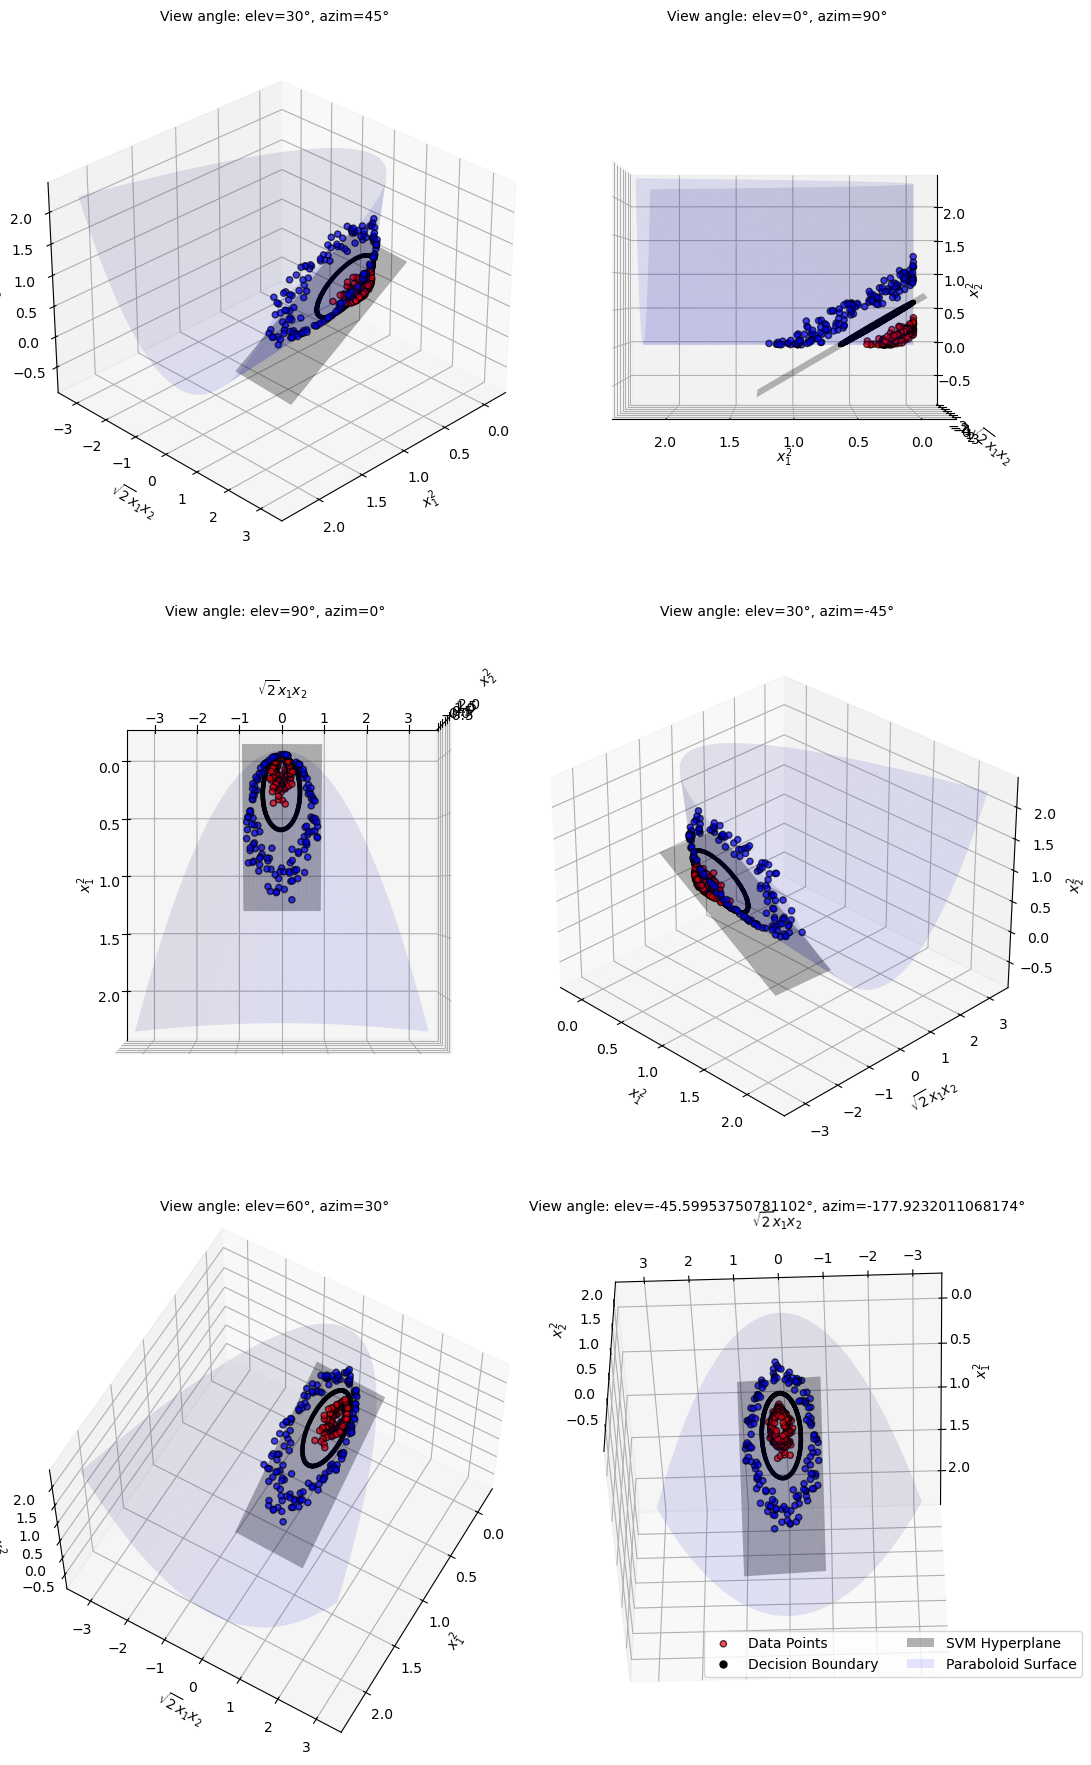

In [2]:
# Train linear SVM on the 3D features
linear_svm_3d = SVC(kernel='linear', C=1.0)
linear_svm_3d.fit(phi_X, y)

# Get the SVM's coefficients and intercept
w = linear_svm_3d.coef_[0]
b = linear_svm_3d.intercept_[0]

# Create a meshgrid for the hyperplane
x_min, x_max = phi_X[:, 0].min() - 0.1, phi_X[:, 0].max() + 0.1
y_min, y_max = phi_X[:, 1].min() - 0.1, phi_X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), 
                    np.linspace(y_min, y_max, 20))

# Calculate corresponding z values for the hyperplane
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Mesh for the paraboloid surface
u = np.linspace(-1.5, 1.5, 50)  # x1 range
v = np.linspace(-1.5, 1.5, 50)  # x2 range
U, V = np.meshgrid(u, v)

# Parametric equations for the paraboloid
X_parab = U**2
Y_parab = np.sqrt(2)*U*V
Z_parab = V**2

# Create a figure with multiple subplots
fig = plt.figure(figsize=(12, 18))

# Angles for viewing
angles = [
    (30, 45),   # Standard isometric view
    (0, 90),    # Side view along y-axis
    (90, 0),    # Top-down view
    (30, -45),  # Alternative angled view
    (60, 30)    # High elevation view
]

normal_vector = linear_svm_3d.coef_[0]  # [w0, w1, w2]

# Calculate elevation and azimuth for edge-on view
azim_parallel = np.degrees(np.arctan2(normal_vector[1], normal_vector[0])) 
elev_parallel = 90 - np.degrees(np.arctan2(np.linalg.norm(normal_vector[:2]), normal_vector[2]))

angles.append((elev_parallel, azim_parallel))

legend_handles = []
legend_labels = []

for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(3, 2, i, projection='3d')
    
    # Plot all elements and collect legend handles from first subplot
    scatter = ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', 
                        edgecolors='k', s=20, alpha=0.7, label='Data Points')
    
    # Decision boundary and margins
    contour_mask = np.isclose(grid_decision, 0, atol=0.01)
    contour = ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2], 
                         c='k', s=5, label='Decision Boundary')

    # Hyperplane
    plane = ax.plot_surface(xx, yy, zz, alpha=0.3, color='black', label='SVM Hyperplane')
    
    # Paraboloid
    parab = ax.plot_surface(X_parab, Y_parab, Z_parab, alpha=0.05, color='blue', 
                          edgecolor='none', label='Paraboloid Surface')
    
    # Store handles for legend (only once)
    if i == 1:
        legend_handles = [
            scatter,
            plt.Line2D([0], [0], marker='o', color='k', linestyle='None', markersize=5),
            plt.Rectangle((0,0),1,1, fc='black', alpha=0.3),
            plt.Rectangle((0,0),1,1, fc='blue', alpha=0.1)
        ]
        legend_labels = [
            'Data Points', 
            'Decision Boundary', 
            'SVM Hyperplane', 
            'Paraboloid Surface'
        ]
    
    ax.set_title(f'View angle: elev={elev}°, azim={azim}°\n', fontsize=10)
    ax.set_xlabel('$x_1^2$', labelpad=5)
    ax.set_ylabel('$\sqrt{2}x_1x_2$', labelpad=5)
    ax.set_zlabel('$x_2^2$', labelpad=5)
    ax.view_init(elev=elev, azim=azim)
    ax.grid(True)

# Add one unified legend
fig.legend(legend_handles, legend_labels,
           loc='lower right', 
           bbox_to_anchor=(0.9, 0.05),
           ncol=2)

plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make space for legend
plt.show()

The mapping

$$
\phi(x_1,x_2) = (x_1^2, \sqrt{2} x_1 x_2, x_2^2)
$$

defines a 2D parametrization of a paraboloid surface in 3D. As shown in the visualizations, this mapping places all original 2D data points precisely on this paraboloid in the extended feature space. Consequently, any decision boundary derived from these transformed points must also lie on this curved surface.

When we apply a linear SVM classifier to the 3D transformed data, it finds a flat hyperplane that separates the classes. In our specific case, the data becomes linearly separable in this higher-dimensional space. The resulting hyperplane appears exactly as expected - a perfect flat plane cutting through the 3D space.

The answers become clear when we consider the relationship between the SVM hyperplane in extended space and the image of $\phi$. While the decision boundary is linear in the extended 3D space, its intersection with the paraboloid surface (where all our data resides) forms a conic section, i.e. an ellipse. This explains why the classifier which is fundamentally linear in the transformed space, projects back to a curved elliptical boundary in the original 2D coordinates. Conversely, a classifier in the original space when mapped onto extended space must lie on the paraboloid, so it cannot appear as a flat hyperplane — only as a conic section of the paraboloid.